In [25]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
#import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import gammainc

In [27]:
df = pd.read_csv('lista8_zad2.csv',header=None)

In [28]:
df

,0
0,0.580439
1,1.742434
2,1.600352
3,-0.260763
4,0.033105
...,...
995,-0.036800
996,0.716377
997,0.892651
998,-0.742318


In [29]:
alpha =0.05
teoretical_var = 1.5
mean = df.mean(0)[0]
var = df.var(0)[0]
test_chi2 = (df.size - 1)*var / teoretical_var
print(mean, var)
print(test_chi2 , chi2.ppf(1-alpha,df.size - 1))
print(1-chi2.cdf(test_chi2,df.size -1))

0.24916501030311 1.6681207941464067
1110.968448901507 1073.6426506574246
0.007511626243917324


a ) $\sigma^2 \ne 1.5$

In [30]:
print('Przedział akceptacji hipotezy zerowej:')
print(f'[{chi2.ppf(alpha/2,df.size - 1)}; {chi2.ppf(1-alpha/2,df.size - 1)}')
print(f'Czyli nasza statystyka testowa chi kwadrat równa {test_chi2} należy strefy krytycznej')
print(f' p = {2-chi2.cdf(test_chi2,df.size -1)*2}')

Przedział akceptacji hipotezy zerowej:
[913.3009983021134; 1088.4870677259353
Czyli nasza statystyka testowa chi kwadrat równa 1110.968448901507 należy strefy krytycznej
 p = 0.015023252487834649


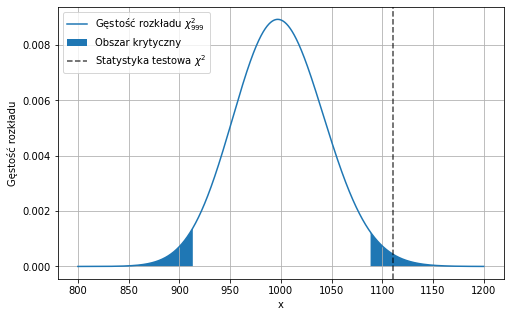

In [40]:
t= np.linspace(800,1200,10**4)
plt.figure(figsize=(8, 5))
plt.plot(t, chi2.pdf(t,df.size-1),label='Gęstość rozkładu $\chi^2_{999}$')
plt.grid()
plt.fill_between(t,0,chi2.pdf(t,df.size-1),where=(t<chi2.ppf(alpha/2,df.size - 1)) | (t > chi2.ppf(1-alpha/2,df.size - 1)),label='Obszar krytyczny')
plt.axvline(x = test_chi2, color = 'black',linestyle = "dashed", alpha = 0.7, label = "Statystyka testowa $\chi^2$")
#plt.annotate(f"$\chi^2 = {test_chi2:.3f} $", xy=(test_chi2 + 10,0.004), color="darkgreen", fontsize=12)
plt.xlabel('x')
plt.ylabel('Gęstość rozkładu')
# plt.title('Gęstość rozkładu $\chi^2_{999}$ z zaznaczonym obszarem krytycznym oraz wartością statystyki $\chi^2$ \n dla hipotezy alterantywnej $\sigma^2 \\ne 1.5$')
plt.legend()
#plt.savefig('images/zad2_1.png')
plt.show()

b) $\sigma^2 \gt 1.5 $

In [42]:
print('Przedział akceptacji hipotezy zerowej:')
print(f'[{-np.inf}; {chi2.ppf(1-alpha,df.size - 1)}]')
print(f'Czyli nasza statystyka testowa chi kwadrat równa {test_chi2} należy strefy krytycznej')
print(f' p = {1-chi2.cdf(test_chi2,df.size -1)}')

Przedział akceptacji hipotezy zerowej:
[-inf; 1073.6426506574246]
Czyli nasza statystyka testowa chi kwadrat równa 1110.968448901507 należy strefy krytycznej
 p = 0.007511626243917324


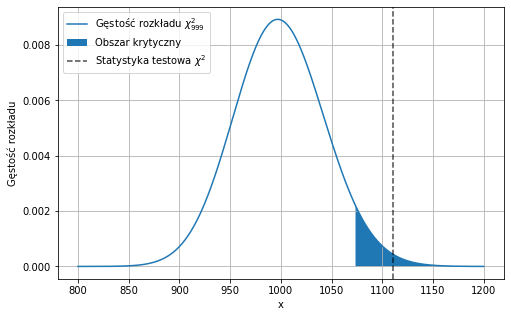

In [45]:
t= np.linspace(800,1200,10**4)
plt.figure(figsize=(8, 5))
plt.plot(t,chi2.pdf(t,df.size-1),label='Gęstość rozkładu $\chi^2_{999}$')
plt.grid()
plt.fill_between(t,0,chi2.pdf(t,df.size-1),where=(t> chi2.ppf(1-alpha,df.size - 1)),label='Obszar krytyczny')
plt.axvline(x = test_chi2, color = 'black', linestyle="dashed", alpha = 0.7, label = "Statystyka testowa $\chi^2$")
#plt.annotate(f"$\chi^2 = {test_chi2:.3f} $", xy=(test_chi2 + 10,0.004), color="darkgreen", fontsize=12)
plt.xlabel('x')
plt.ylabel('Gęstość rozkładu')
# plt.title('Gęstość rozkładu $\chi^2_{999}$ z zaznaczonym obszarem krytycznym oraz wartością statystyki $\chi^2$ \n dla hipotezy alterantywnej $\sigma^2 > 1.5$')
plt.legend()
#plt.savefig('images/zad2_2.pdf')

c) $\sigma^2 \lt 1.5 $

In [46]:

print('Przedział akceptacji hipotezy zerowej:')
print(f'[{chi2.ppf(alpha,df.size - 1)}; {np.inf}]')
print(f'Czyli nasza statystyka testowa chi kwadrat równa {test_chi2}  należy strefy akceptacji hipotezy zerowej')
print(f' p = {gammainc((df.size-1)/2,test_chi2/2)}')

Przedział akceptacji hipotezy zerowej:
[926.6311609204329; inf]
Czyli nasza statystyka testowa chi kwadrat równa 1110.968448901507  należy strefy akceptacji hipotezy zerowej
 p = 0.9924883737560827


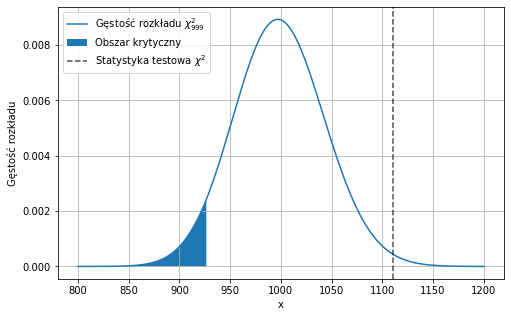

In [49]:
t= np.linspace(800,1200,10**4)
plt.figure(figsize=(8, 5))
plt.plot(t,chi2.pdf(t,df.size-1),label='Gęstość rozkładu $\chi^2_{999}$')
plt.grid()
plt.fill_between(t,0,chi2.pdf(t,df.size-1),where=(t< chi2.ppf(alpha,df.size - 1)),label='Obszar krytyczny')
plt.axvline(x = test_chi2, color = 'black', linestyle="dashed", alpha=0.7, label = "Statystyka testowa $\chi^2$")
#plt.annotate(f"$\chi^2 = {test_chi2:.3f}$ ", xy=(test_chi2 + 10,0.004), color="darkgreen", fontsize=12)
plt.xlabel('x')
plt.ylabel('Gęstość rozkładu')
# plt.title('Gęstość rozkładu $\chi^2_{999}$ z zaznaczonym obszarem krytycznym oraz wartością statystyki $\chi^2$\n dla hipotezy alterantywnej $\sigma^2 < 1.5$')
plt.legend()
#plt.savefig('images/zad2_3.pdf')

In [49]:
gammainc((df.size-1)/2,test_chi2/2) + 1-chi2.cdf(test_chi2,df.size -1)

1.0